In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from openpharmacophore.dynophore import Dynophore
from IPython.display import Image
import os
import mdtraj as md
import numpy as np

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Pharmacophoric points analysis for MD simulation of ERalpha

### Load trajectory

In [5]:
traj_file = "../../data/trajectories/ERalpha.h5"
traj = md.load(traj_file)
print(traj)
print(traj.topology)

<mdtraj.Trajectory with 1000 frames, 27425 atoms, 8028 residues, and unitcells>
<mdtraj.Topology with 4 chains, 8028 residues, 27425 atoms, 19689 bonds>


## Get pharmacophores from the first and last frame only

In [6]:
dynophore = Dynophore(traj)
dynophore.first_and_last_pharmacophore()
dynophore.pharmacophores

[StructuredBasedPharmacophore(n_elements: 9),
 StructuredBasedPharmacophore(n_elements: 6)]

In [7]:
dynophore.pharmacophores[0].elements

[HbAcceptorSphereAndVector(center: (28.34, 17.742, 25.083); radius: 1.0; direction: (0.4886, -0.87, -0.066)),
 HbAcceptorSphereAndVector(center: (37.768, 12.081, 23.029); radius: 1.0; direction: (-0.6034, 0.2741, 0.7489)),
 HbDonorSphereAndVector(center: (28.34, 17.742, 25.083); radius: 1.0; direction: (0.1793, 0.4914, 0.8523)),
 HbDonorSphereAndVector(center: (37.768, 12.081, 23.029); radius: 1.0; direction: (-0.3717, -0.9283, 0.0118)),
 HydrophobicitySphere(center: (33.452, 15.524, 23.64); radius: 1.0),
 HydrophobicitySphere(center: (31.2353, 16.7123, 24.6887); radius: 1.0),
 HydrophobicitySphere(center: (30.49, 15.3043, 23.3997); radius: 1.0),
 HydrophobicitySphere(center: (35.225, 12.201, 24.116); radius: 1.0),
 HydrophobicitySphere(center: (36.287, 12.367, 21.152); radius: 1.0)]

In [9]:
dynophore.pharmacophores[0].show()

NGLWidget()

In [10]:
dynophore.pharmacophores[-1].elements

[HbAcceptorSphereAndVector(center: (21.4, 23.433, 23.959); radius: 1.0; direction: (0.9029, 0.0437, 0.4276)),
 HbAcceptorSphereAndVector(center: (32.187, 20.784, 24.975); radius: 1.0; direction: (-0.8643, 0.3032, 0.4012)),
 HbDonorSphereAndVector(center: (21.4, 23.433, 23.959); radius: 1.0; direction: (-0.9257, -0.2297, 0.3006)),
 HydrophobicitySphere(center: (24.896, 20.102, 23.084); radius: 1.0),
 HydrophobicitySphere(center: (30.969, 19.259, 23.494); radius: 1.0),
 HydrophobicitySphere(center: (25.44, 22.574, 23.702); radius: 1.0)]

In [11]:
dynophore.pharmacophores[-1].show()

NGLWidget()

## Pharmacophore Analysis

### Get Pharmacophores for each frame of the trajectory

In [12]:
dynophore = Dynophore(traj)
frames = list(range(0, traj.n_frames))
dynophore.pharmacophores_from_frames(frames, load_ligand=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
print(f"Number of pharmacophores {len(dynophore.pharmacophores)}\n")
print(dynophore.pharmacophores[0:3])

Number of pharmacophores 1000

[StructuredBasedPharmacophore(n_elements: 9), StructuredBasedPharmacophore(n_elements: 6), StructuredBasedPharmacophore(n_elements: 7)]


### Get all unique pharmacophoric points

In [14]:
dynophore.pharmacophoric_point_frequency()

,index,Feature Name,Frequency,Atoms Indices
0,1,hb acceptor 2,0.991,{18}
1,0,hb acceptor 1,0.879,{3}
2,2,hb donor 1,0.811,{3}
3,9,hydrophobicity 6,0.599,{4}
4,3,hb donor 2,0.561,{18}
5,5,hydrophobicity 2,0.488,{0}
6,8,hydrophobicity 5,0.323,{16}
7,7,hydrophobicity 4,0.269,{19}
8,11,hydrophobicity 8,0.228,{1}
9,13,hydrophobicity 10,0.224,{15}


In [15]:
unique_points = dynophore.unique_pharmacophoric_points
print(f"Number of unique points is {len(unique_points)}")

Number of unique points is 19


### Derive a pharmacophore model from the most frequent points

In [16]:
freq_threshold = 0.5
frequency_pharmacophore = dynophore.pharmacophore_by_frequency(freq_threshold)
print(frequency_pharmacophore)
print(frequency_pharmacophore.elements)

Pharmacophore(n_elements: 5)
[HbAcceptorSphere(center: (25.0894, 20.0576, 23.4682); radius: 1.0), HbAcceptorSphere(center: (34.3315, 14.9745, 25.9307); radius: 1.0), HbDonorSphere(center: (25.1247, 19.8936, 23.3244); radius: 1.0), HbDonorSphere(center: (34.0505, 14.3638, 26.2629); radius: 1.0), HydrophobicitySphere(center: (27.0897, 18.2293, 23.3299); radius: 1.0)]


### Analyze frequency of all unique points

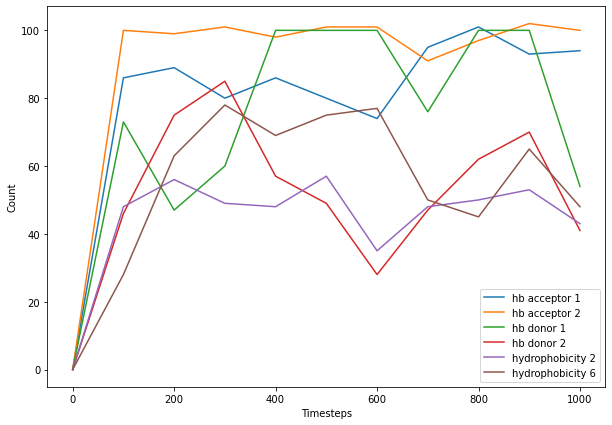

<AxesSubplot:xlabel='Timesteps', ylabel='Count'>

In [17]:
dynophore.point_frequency_plot(0.4)

In [18]:
# Create a pharmacophore with the following elements:
elements = ["hb acceptor 1", "hb acceptor 2", "hb donor 1", "hb donor 2"]
custom_pharmacophore = dynophore.pharmacophore_from_unique_points(elements)
custom_pharmacophore

Pharmacophore(n_elements: 4)

## 2D Representation of the Dynamic Pharmacophore

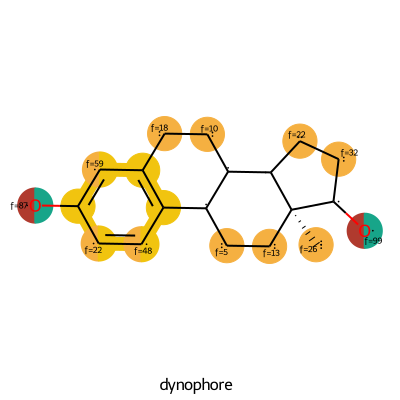

In [55]:
img_file = "./dynophore.png"
dynophore.draw(img_file, (400, 400), 0.05)
Image(img_file)

## Representative Pharmacophore Models

In [19]:
rpms = dynophore.representative_pharmacophore_models()

In [20]:
print(f"{len(rpms)} representative pharmacophore models")

95 representative pharmacophore models


## Common Hits Approach